In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import warnings
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/weather.csv')
print("Shape :", data.shape)

Shape : (366, 24)


In [4]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [5]:
data.info

<bound method DataFrame.info of            Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1     11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2     11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3     11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4     11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   
..          ...       ...      ...      ...       ...          ...       ...   
361  10/27/2008  Canberra      9.0     30.7       0.0          7.6      12.1   
362  10/28/2008  Canberra      7.1     28.4       0.0         11.6      12.7   
363  10/29/2008  Canberra     12.5     19.9       0.0          8.4       5.3   
364  10/30/2008  Canberra     12.5     26.9       0.0          5.0       7.1   
365  10/31/2008  Canberra     12.3     30.2       0.0          6.0      12.6   

    Win

In [6]:
data.isna().sum()

Date              0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [7]:
data = data.dropna()
data.shape

(328, 24)

## Label Encoding the nominal data


In [8]:
#As our dataset has categorical data we will be using label encoder to convert them into numerical data
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'WindGustDir'.
data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
data['WindDir9am'] = label_encoder.fit_transform(data['WindDir9am'])

<ipython-input-8-ae38daca6672>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindGustDir'] = label_encoder.fit_transform(data['WindGustDir'])
<ipython-input-8-ae38daca6672>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WindDir3pm'] = label_encoder.fit_transform(data['WindDir3pm'])
<ipython-input-8-ae38daca6672>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [9]:
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,7,30.0,12,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,1,39.0,0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,7,85.0,3,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,7,54.0,14,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,10,50.0,10,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [10]:
data['RainToday'].value_counts()

No     267
Yes     61
Name: RainToday, dtype: int64

In [11]:
data['RainTomorrow'].value_counts()

No     268
Yes     60
Name: RainTomorrow, dtype: int64

In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,6.192073,40.396341,7.067073,7.512195,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,4.337765,13.132176,3.897197,4.560819,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,0.000000,13.000000,0.000000,0.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,2.000000,31.000000,3.000000,4.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,6.500000,39.000000,7.500000,7.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,8.000000,46.000000,10.000000,13.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,15.000000,98.000000,15.000000,15.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


## Descriptive Analysis

### Average conditions required for Raintoday can be seen below


In [13]:
def compare_mean(weather_conditions =[ 'MinTemp',	'MaxTemp','Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm',	'Pressure9am',	'Pressure3pm'	,'Cloud9am',	'Cloud3pm',	'Temp9am'	,'Temp3pm','RISK_MM']):

    print("\nAverage Value for", weather_conditions,"is {0:.2f}".format(data[weather_conditions].mean()))
    print("\n----------------------------------------------")
    print("\Yes : {0:.2f}".format(data[data['RainToday'] == 'Yes'][weather_conditions].mean()))
    print("No: {0:.2f}".format(data[(data['RainToday'] == 'No')][weather_conditions].mean()))


In [14]:
print('weather_conditions:',['MinTemp',	'MaxTemp','Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm',	'Pressure9am',	'Pressure3pm'	,'Cloud9am',	'Cloud3pm',	'Temp9am'	,'Temp3pm','RISK_MM'])

mean_compare = input("Enter the Condition require from above options: ")
compare_mean(mean_compare)

weather_conditions: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
Enter the Condition require from above options: MinTemp

Average Value for MinTemp is 7.74

----------------------------------------------
\Yes : 10.39
No: 7.14


### Median conditions for RainToday can be seen below

In [15]:
def compare_median(weather_conditions =[ 'MinTemp',	'MaxTemp','Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm',	'Pressure9am',	'Pressure3pm'	,'Cloud9am',	'Cloud3pm',	'Temp9am'	,'Temp3pm','RISK_MM']):

    print("\nAverage Value for", weather_conditions,"is {0:.2f}".format(data[weather_conditions].mean()))
    print("\n----------------------------------------------")
    print("\Yes : {0:.2f}".format(data[data['RainToday'] == 'Yes'][weather_conditions].mean()))
    print("No: {0:.2f}".format(data[(data['RainToday'] == 'No')][weather_conditions].mean()))


In [17]:
print('weather_conditions:',['MinTemp',	'MaxTemp','Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm',	'Pressure9am',	'Pressure3pm'	,'Cloud9am',	'Cloud3pm',	'Temp9am'	,'Temp3pm','RISK_MM'])

median_compare = input("Enter the Condition require from above options: ")
compare_median(median_compare)

weather_conditions: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']
Enter the Condition require from above options: MinTemp

Average Value for MinTemp is 7.74

----------------------------------------------
\Yes : 10.39
No: 7.14


<Axes: xlabel='RainTomorrow', ylabel='Sunshine'>

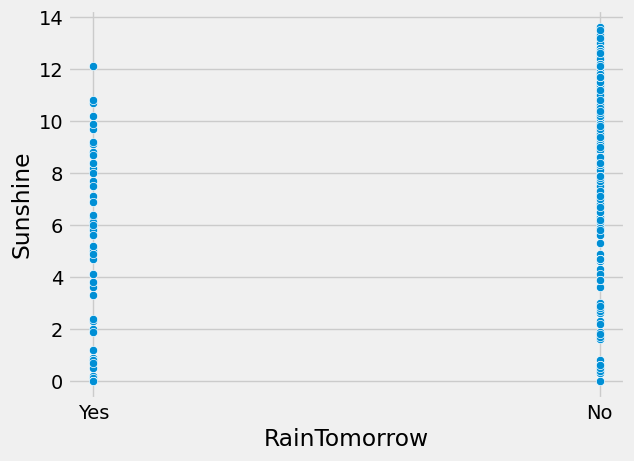

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
sb.scatterplot(x=data['RainTomorrow'],y=data['Sunshine'])

In [19]:
data[['MinTemp',	'MaxTemp','Rainfall',	'Evaporation',	'Sunshine',	'WindGustDir',	'WindGustSpeed',	'WindDir9am','WindDir3pm','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm',	'Pressure9am',	'Pressure3pm'	,'Cloud9am',	'Cloud3pm',	'Temp9am'	,'Temp3pm','RISK_MM']].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.745911,0.197339,0.634720,0.007730,-0.195152,0.190596,-0.152769,-0.073086,0.058319,-0.106321,-0.160781,-0.013897,-0.502352,-0.503255,0.211640,0.125914,0.910805,0.716051,0.251519
MaxTemp,0.745911,1.000000,-0.077263,0.673162,0.444863,-0.221090,0.070911,-0.142032,0.002470,-0.296485,-0.219886,-0.325106,-0.520412,-0.268054,-0.367040,-0.187416,-0.144976,0.869609,0.988925,0.058638
Rainfall,0.197339,-0.077263,1.000000,-0.011767,-0.158062,0.016604,0.099442,0.016958,0.073679,0.238705,0.058151,0.146321,0.287244,-0.348731,-0.263710,0.172610,0.134894,0.071893,-0.089740,0.101909
Evaporation,0.634720,0.673162,-0.011767,1.000000,0.310124,-0.162880,0.258050,-0.188493,-0.078828,0.006259,0.019594,-0.492218,-0.374532,-0.363936,-0.380702,-0.114261,-0.111387,0.688749,0.655896,0.099727
Sunshine,0.007730,0.444863,-0.158062,0.310124,1.000000,-0.028878,0.084768,-0.034646,0.140157,-0.103841,0.046140,-0.501596,-0.760267,0.025630,-0.024120,-0.697603,-0.657198,0.199659,0.463721,-0.357231
WindGustDir,-0.195152,-0.221090,0.016604,-0.162880,-0.028878,1.000000,0.246521,0.113201,0.348528,0.215597,0.336774,0.022353,0.058876,-0.156516,-0.143504,0.007572,-0.003987,-0.198693,-0.226572,0.019877
WindGustSpeed,0.190596,0.070911,0.099442,0.258050,0.084768,0.246521,1.000000,-0.061410,0.154015,0.540717,0.687071,-0.338276,-0.043254,-0.524737,-0.510826,-0.018216,0.042849,0.229164,0.036039,0.269151
WindDir9am,-0.152769,-0.142032,0.016958,-0.188493,-0.034646,0.113201,-0.061410,1.000000,0.043483,0.047301,0.009134,0.016366,0.000422,0.080441,0.089318,-0.008420,0.042902,-0.131304,-0.121140,-0.124486
WindDir3pm,-0.073086,0.002470,0.073679,-0.078828,0.140157,0.348528,0.154015,0.043483,1.000000,0.100458,0.115656,0.026395,-0.137508,-0.246010,-0.236448,-0.146754,-0.126665,-0.072890,0.007622,-0.052639
WindSpeed9am,0.058319,-0.296485,0.238705,0.006259,-0.103841,0.215597,0.540717,0.047301,0.100458,1.000000,0.495946,-0.222337,0.202122,-0.344290,-0.233682,0.117625,-0.012990,-0.017843,-0.315906,0.053529


<Axes: >

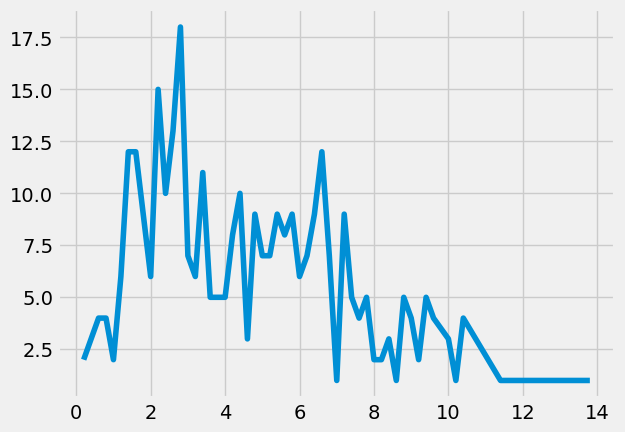

In [20]:
data['Evaporation'].value_counts().sort_index().plot.line()

<Axes: >

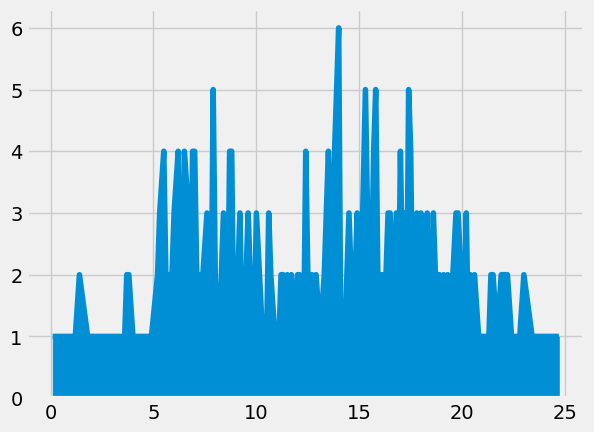

In [21]:
data['Temp9am'].value_counts().sort_index().plot.area()

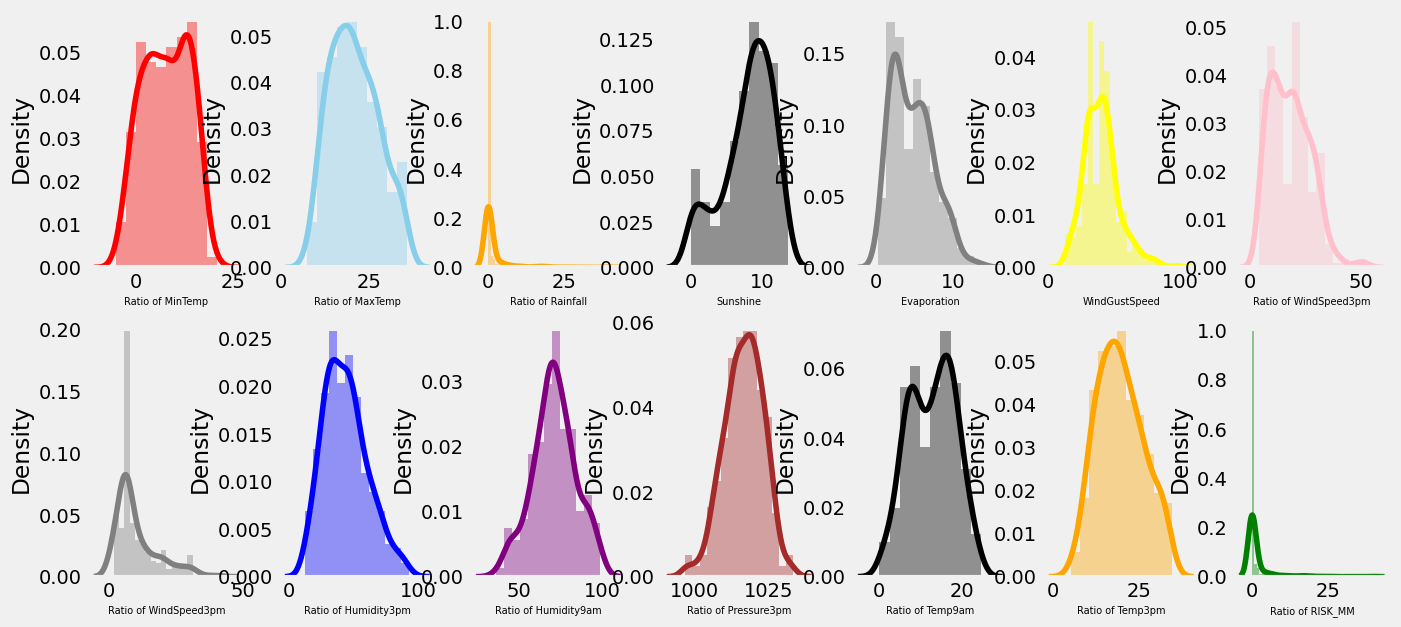

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15,7)

plt.subplot(2, 7, 1)
sns.distplot(data['MinTemp'], color = 'red')
plt.xlabel('Ratio of MinTemp', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 2)
sns.distplot(data['MaxTemp'], color = 'skyblue')
plt.xlabel('Ratio of MaxTemp', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 3)
sns.distplot(data['Rainfall'], color ='orange')
plt.xlabel('Ratio of Rainfall', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 4)
sns.distplot(data['Sunshine'], color = 'black')
plt.xlabel('Sunshine', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 5)
sns.distplot(data['Evaporation'], color = 'grey')
plt.xlabel('Evaporation', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 6)
sns.distplot(data['WindGustSpeed'], color = 'yellow')
plt.xlabel('WindGustSpeed', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 7)
sns.distplot(data['WindSpeed3pm'], color ='pink')
plt.xlabel('Ratio of WindSpeed3pm', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 8)
sns.distplot(data['WindSpeed9am'], color ='grey')
plt.xlabel('Ratio of WindSpeed3pm', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 9)
sns.distplot(data['Humidity3pm'], color ='blue')
plt.xlabel('Ratio of Humidity3pm', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 10)
sns.distplot(data['Humidity9am'], color ='purple')
plt.xlabel('Ratio of Humidity9am', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 11)
sns.distplot(data['Pressure3pm'], color ='brown')
plt.xlabel('Ratio of Pressure3pm', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 12)
sns.distplot(data['Temp9am'], color ='black')
plt.xlabel('Ratio of Temp9am', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 13)
sns.distplot(data['Temp3pm'], color ='orange')
plt.xlabel('Ratio of Temp3pm', fontsize = 7)
plt.grid()

plt.subplot(2, 7, 14)
sns.distplot(data['RISK_MM'], color ='green')
plt.xlabel('Ratio of RISK_MM', fontsize = 7)
plt.grid()

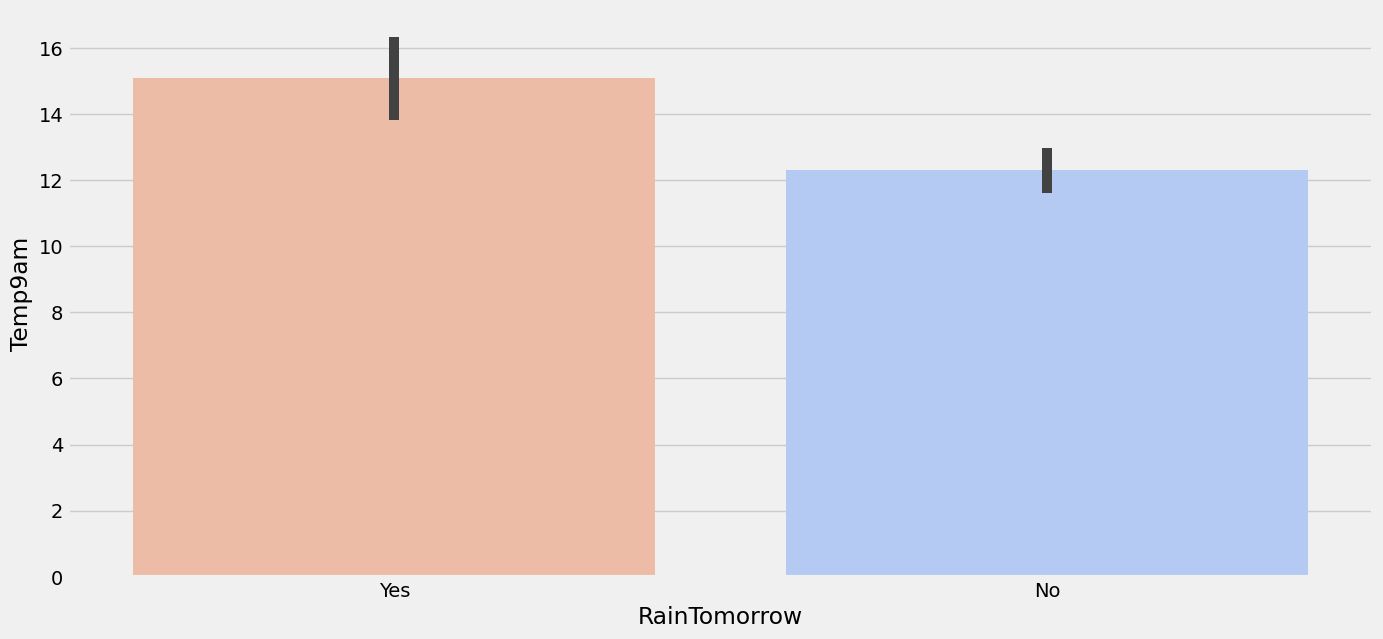

In [23]:
sns.barplot(x='RainTomorrow', y='Temp9am', data=data, palette = 'coolwarm_r')

<Axes: ylabel='RainToday'>

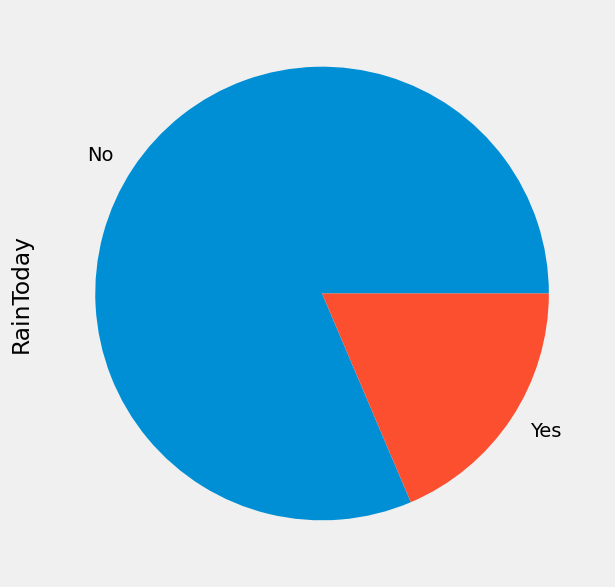

In [24]:
data['RainToday'].value_counts().plot(kind='pie')

In [25]:
data['RainToday']=data['RainToday'].apply(lambda x:1 if x == "Yes" else 0)
data['RainTomorrow']=data['RainTomorrow'].apply(lambda x:1 if x == "Yes" else 0)

In [26]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,7,30.0,12,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,1,39.0,0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,7,85.0,3,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,7,54.0,14,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,10,50.0,10,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
5,11/6/2007,Canberra,6.2,16.9,0.0,5.8,8.2,9,44.0,9,...,57,1023.8,1021.7,7,5,10.9,14.8,0,0.2,0
6,11/7/2007,Canberra,6.1,18.2,0.2,4.2,8.4,9,43.0,9,...,47,1024.6,1022.2,4,6,12.4,17.3,0,0.0,0
7,11/8/2007,Canberra,8.3,17.0,0.0,5.6,4.6,0,41.0,9,...,57,1026.2,1024.2,6,7,12.1,15.5,0,0.0,0
8,11/9/2007,Canberra,8.8,19.5,0.0,4.0,4.1,8,48.0,0,...,48,1026.1,1022.7,7,7,14.1,18.9,0,16.2,1
9,11/10/2007,Canberra,8.4,22.8,16.2,5.4,7.7,0,31.0,8,...,32,1024.1,1020.7,7,1,13.3,21.7,1,0.0,0


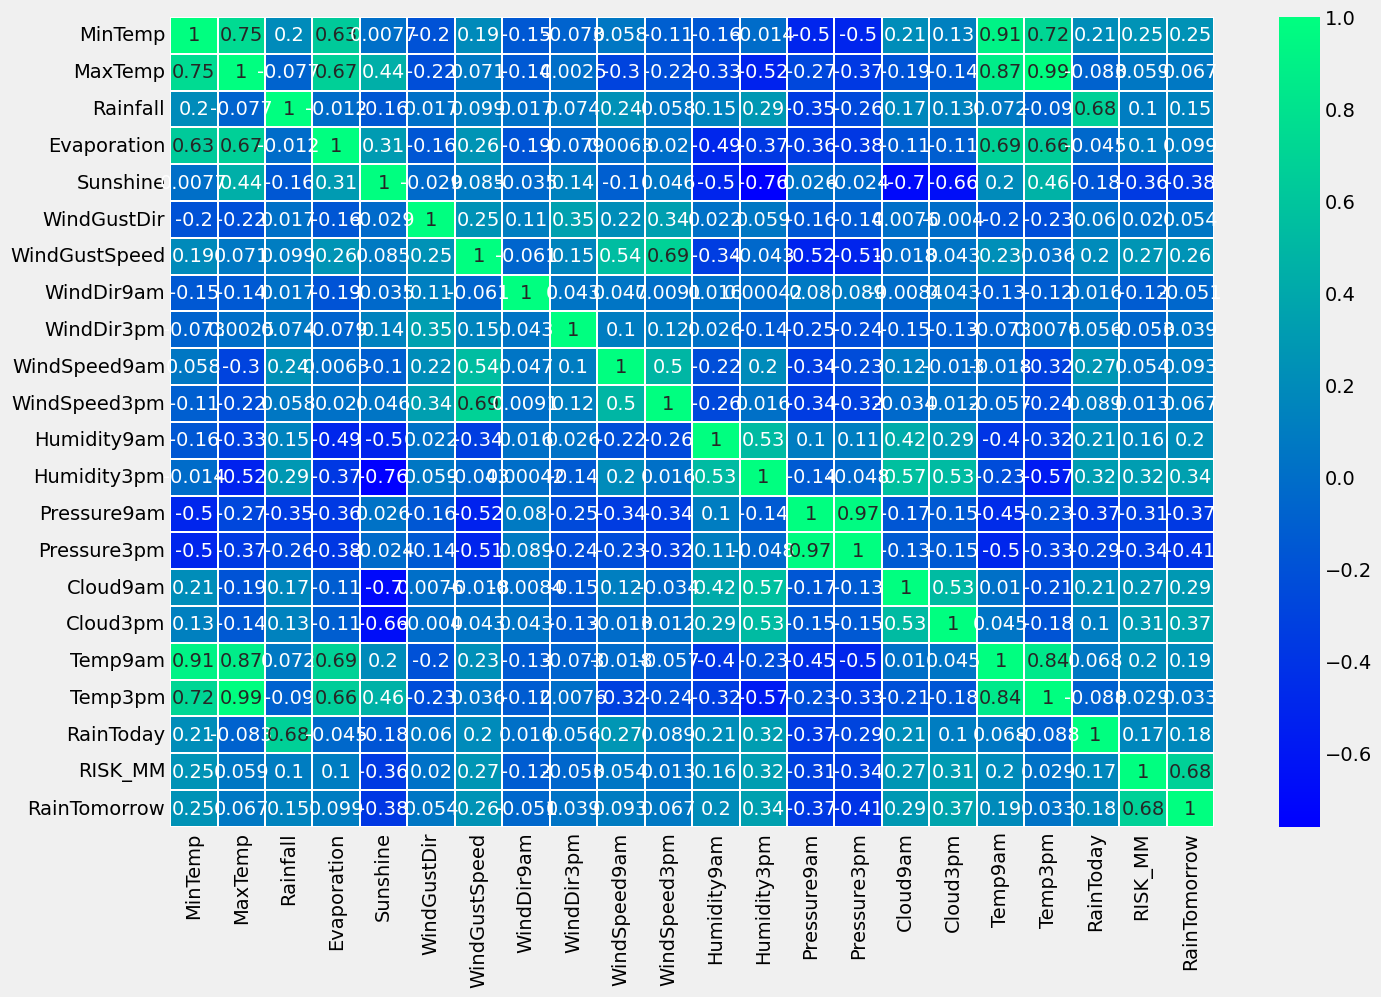

<Figure size 1500x700 with 0 Axes>

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

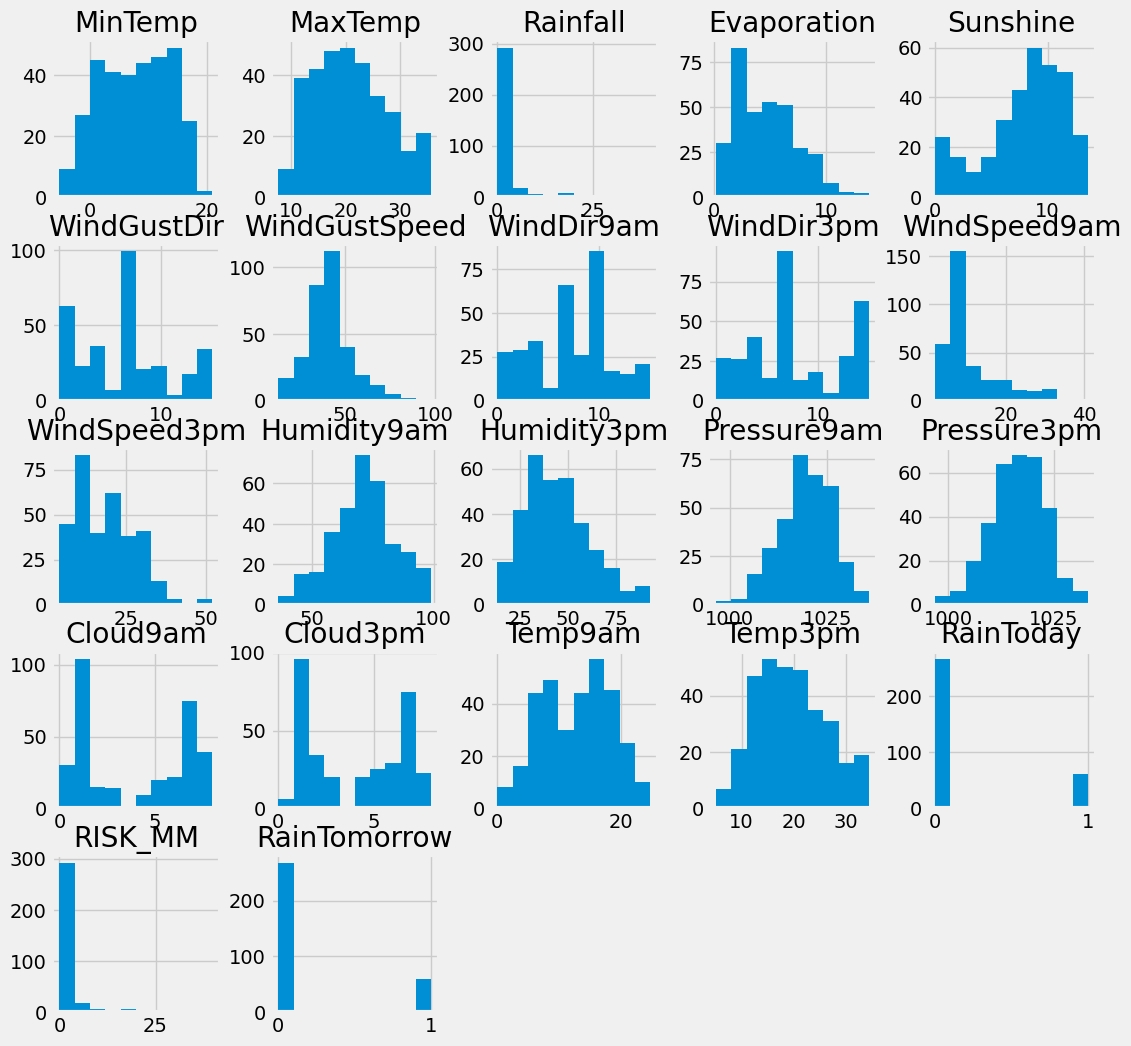

In [28]:
data.hist(figsize=(12,12))
plt.savefig('featuresplot')

In [29]:
x_data = data.drop(['Date','Location','RainTomorrow'],axis=1)
y_data = data['RainTomorrow']

In [30]:
x_train  , x_test , y_train,y_test = train_test_split(x_data,y_data , test_size = 0.2,random_state = 2)

In [31]:
from sklearn.linear_model import LogisticRegression

penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'sag']
max_iter = [500]

logistic_score_max = 0
best_penalty = ''
best_solver = ''
best_max_iter = 0

for a in penalty:
    for b in solver:
        for c in max_iter:
            if((a=='l2') and (b == 'newton-cg' or b == 'lbfgs' or b == 'sag')):
                classifier = LogisticRegression(penalty = a, solver = b, max_iter = c)
                classifier.fit(x_train,y_train)
                y_pred = classifier.predict(x_test)
                score = classifier.score(x_test,y_test)
                if(logistic_score_max<=score):
                    logistic_score_max =  score
                    best_max_iteration = c
                    best_penalty = a
                    best_solver = b

best_logistic_parameter = {'penalty' : best_penalty,'solver' : best_solver,'max_iter' : best_max_iteration}

print(logistic_score_max)
print(best_logistic_parameter)

0.9696969696969697
{'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 500}


In [32]:

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.svm import SVC

C=[1,5,10,15,20,25,30,35]
kernel=["rbf","linear"]
gamma=["auto",0.01,0.001,0.0001,0.00015,0.05,0.05,1,1.5]
decision_function_shape=["ovo","ovr"]

SVM_score_max = 0
best_C = ''
best_kernal = ''
best_gamma = 0
best_decision_function_shape = 0

for a in C:
    for b in kernel:
        for c in gamma:
            for i in decision_function_shape:
                svm_model_classifier=SVC(C=a,kernel=b,gamma=c,decision_function_shape=i,random_state=0)
                svm_model_classifier.fit(x_train,y_train)
                score = svm_model_classifier.score(x_test,y_test)
                if(SVM_score_max<=score):
                    SVM_score_max =  score
                    best_c = a
                    best_kernal = b
                    best_gamma = c
                    best_decision_function_shape = i


best_SVM_parameter = {'C' : best_c,'kernal' : best_kernal,'gamma' : best_gamma,'decision_function_shape' : best_decision_function_shape}
print(SVM_score_max)
print(best_SVM_parameter)

0.9848484848484849
{'C': 35, 'kernal': 'linear', 'gamma': 1.5, 'decision_function_shape': 'ovr'}


In [33]:
from sklearn.tree import DecisionTreeClassifier

criterion = ['entropy', 'gini','log_loss']
splitter = ['best', 'random']
max_features = [5,10,15,20,25]
max_depth = [10,15,20,25]

best_criterion = 0
best_splitter = ''
best_max_depth = 0
best_max_features = 0
DT_score_max = 0


for a in criterion:
    for b in splitter:
        for c in max_features:
            for d in max_depth:
                decision_classifier = DecisionTreeClassifier(criterion=a, splitter = b, max_features = c, max_depth = d)
                decision_classifier.fit(x_train,y_train)
                y_pred_dec = decision_classifier.predict(x_test)
                score = decision_classifier.score(x_test,y_test)
            if(DT_score_max<=score):
                    DT_score_max =  score
                    best_criterion = a
                    best_splitter = b
                    best_max_features = c
                    best_max_depth = d


best_DT_para = {'criterion' : best_criterion,'splitter' : best_splitter,'max_features' : best_max_features,'max_depth' : best_max_depth}
print(best_DT_para)
print(DT_score_max)

{'criterion': 'log_loss', 'splitter': 'random', 'max_features': 25, 'max_depth': 25}
1.0


In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

sample_leaf_options = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

best_min_samples_leaf = 0
max_RF_score = 0

for leaf_size in sample_leaf_options :
    model = RandomForestClassifier(n_estimators = 200, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    if(max_RF_score<=score):
        max_RF_score =  score
        best_min_samples_leaf = leaf_size


best_RF_para = {'n_estimators' : 200,'n_jobs' : -1,'random_state' : 50,'min_samples_leaf' : best_min_samples_leaf}
print(best_RF_para)
print(max_RF_score)

{'n_estimators': 200, 'n_jobs': -1, 'random_state': 50, 'min_samples_leaf': 7}
1.0


In [35]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( x_train, y_train), ( x_test, y_test)]

    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

In [37]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5822279382750828, 'gamma': 4.242774211899158, 'max_depth': 3.0, 'min_child_weight': 8.0, 'reg_alpha': 122.0, 'reg_lambda': 0.9705936168722963}


In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [ 100,200,300]
grid['learning_rate'] = [0.01,0.5,1]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'learning_rate': 0.01, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 200}
1.000000 (0.000000) with: {'learning_rate': 0.01, 'n_estimators': 300}
1.000000 (0.000000) with: {'learning_rate': 0.5, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.5, 'n_estimators': 200}
1.000000 (0.000000) with: {'learning_rate': 0.5, 'n_estimators': 300}
1.000000 (0.000000) with: {'learning_rate': 1, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 1, 'n_estimators': 200}
1.000000 (0.000000) with: {'learning_rate': 1, 'n_estimators': 300}


In [39]:
data['Average Humidity']=(data['Humidity9am']+data['Humidity3pm'])/2
humidity_q80=data['Average Humidity'].quantile(0.80)
data['Average Temperature']=(data['MinTemp']+data['MaxTemp'])/2
temperature_q80=data['Average Temperature'].quantile(0.80)
data_hum_temp =data[data['Average Humidity']>humidity_q80]


In [40]:
data_hum_temp=data[data['Average Temperature']>temperature_q80]

In [41]:
loc_hum_temp = data_hum_temp['Date']
loc_hum_temp.head()

1      11/2/2007
13    11/14/2007
14    11/15/2007
15    11/16/2007
16    11/17/2007
Name: Date, dtype: object